# Chapter 8: Dimensionality Reduction

Training sets that are composed of instances with a large number of features (i.e. vectors of high dimension) take a long time to train. This is often referred to as the <i>curse of dimensionality</i>. In addition to speeding up training, reducing the dimension of the data also helps with visualizations, since it is not possible to create visual representations of high dimensional data.

## The Curse of Dimensionality

High dimensional datasets are both more likely to have instances which have certain features with extreme values. Also, points in higher dimensions are more sparse than points in lower dimensions. Both of these factors make training models with high dimensional datasets more difficult.

## Main Approaches for Dimensionality Reduction

## Projection

Often times, all of the instances in a training set have roughly uniform values in some dimensions and vary more in others. These instances can be treated as if they resided in a lower-dimensional subspace of the original, high-dimensional space. Projecting the training instances onto a lower dimensional subspace can be an effective way of reducing the dimension of the training set.

## Manifold Learning

A $d$-dimensional manifold is a part of an $n$-dimensional space (where $d < n$) that locally resembles a $d$-dimensional hyperplane. Dimensionality reduction algorithms which work by modeling the manifold on which the training set lies are called <i>Manifold Learning</i> algorithms. They rely on the <i>manifold assumption</i> (or <i>manifold hypothesis</i>) which states that most real-world high-dimensional datasets lie close to a lower-dimensional manifold.

In addition to the manifold assumption, there is an implicit assumption that the decision boundary will be simpler in the lower-dimensional manifold. Whether or not this assumption holds varies by dataset and choice of manifold.

## PCA

<i>Principal Component Analysis</i> is the most popular dimensionality reduction algorithm. It tries to find the manifold that the data lies in, then projects the data onto the manifold.

### Preserving Variance

One of the goals of PCA is to select the axis where the dataset has the most variance so that you lose as little information as possible. One way to do this is to minimize the mean squared distance from the original dataset to the projected dataset.

### Principal Components

Once PCA finds an axis which preserves the variance, it then continues to find a 2<sup>nd</sup> axis orthogonal to the first which also preserves the variance of the original dataset. PCA continues to do so until it finds a set of basis vectors which span the entire space of the original dataset.

One can use a matrix factorization technique called <i>Singular Value Decomposition</i> (SVD) to find the principal components of a training set, $\mathbf{X}$ by decomposing $\mathbf{X}$ into the product of three matrices: $\mathbf{U}$, $\Sigma$, and $\mathbf{V}^{\,T}$ where $\mathbf{V}$ is the matrix whose columns are the principal components, i.e.

$$ V = \left( \mathbf{c}_1, \mathbf{c}_2, ..., \mathbf{c}_n \right) $$

where $\mathbf{c}_i$ are the principal components of the dataset. The following code implements SVD using `numpy`.

In [1]:
from sklearn.datasets import make_swiss_roll
import numpy as np

X, y = make_swiss_roll(n_samples=1000)

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
X

array([[ -2.14398896,   9.11611324, -10.58061044],
       [  3.75289099,  20.94739923,  13.34539353],
       [  9.38008742,  15.57541928,   9.5115486 ],
       ...,
       [  3.09409184,   4.20731077,   6.74861884],
       [ -9.31300677,  11.33950619,   0.75673321],
       [  4.06981975,  14.71720297,   6.01052906]])

### Projecting Down to d Dimensions

Once you find all of the principal components of the dataset's space, you can project them down to a $d$-dimensional hyperplane by projecting each instance onto the first $d$ principal components.

You can do so by multiplying the matrix of instances, $\mathbf{X}$, by the matrix $\mathbf{W}_d$ which is a matrix whose columns are made up of the first $d$ principal components, i.e.

$$ \mathbf{X}_\text{d-proj} = \mathbf{W}_d \cdot \mathbf{X}. $$

In [2]:
W2 = Vt.T[:, :2]
X_2D = X_centered.dot(W2)
X_2D

array([[-11.65042789,   0.4112796 ],
       [ 14.175563  ,  -6.92502122],
       [ 12.14651008,   1.31204917],
       ...,
       [  5.2667883 ,   1.535074  ],
       [ -4.010732  , -10.16790664],
       [  6.70071351,  -1.77716095]])

### Using Scikit-Learn

Scikit-Learn's `PCA` class uses SVD decomposition. An example of doing the projection above with Scikit-Learn is below.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)
X_2D

array([[-11.65042789,  -0.4112796 ],
       [ 14.175563  ,   6.92502122],
       [ 12.14651008,  -1.31204917],
       ...,
       [  5.2667883 ,  -1.535074  ],
       [ -4.010732  ,  10.16790664],
       [  6.70071351,   1.77716095]])

### Explained Variance Ratio

The <i>explained variance ratio</i> is a list containing what percentage of the data's variance is along each particular principal component. Scikit-Learn's `PCA` class lets you access this data.

In [4]:
pca.explained_variance_ratio_

array([0.41682205, 0.31401447])

### Choosing the Right Number of Dimensions

When using PCA, you want to project to a subspace which preserves about 95% of the variance of the original dataset. For visualization, you typically want to project the data onto a 2- or 3-dimensional dataset.

The following code finds the principal components without reducing dimensionality, then computes how many dimensions you need to preserve 95% of the original variance.

In [5]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
np.argmax(cumsum >= 0.95) + 1

3

Setting n_components to a float between 0 and 1, p, will have PCA automatically compute the dimension which preserves (100 * p) percent of the variance.

In [6]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
len(X_reduced[0])

3

Another option is to plot the explained variance as a function of the dimension. Once the curve reaches a certain dimension, the curve levels off.

### PCA for Compression

Projecting the data onto a lower dimension can speed up training a model without losing much information. For example, you can reduce the MNIST dataset from over 700 features to 150 features and preserve 95% of its variance.

It is also possible to decompress the data back to its original dimension, but since a projection operation is not invertible, you do not get the lost variance back. The <i>reconstruction error</i> is the mean squared distance between the reconstructed dataset and the original one.

In [0]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
sorted_indices = np.argsort(mnist.target)
X = mnist.data[sorted_indices]
y = mnist.target[sorted_indices]
rand_idx = np.random.permutation(len(X))
X, y = X[rand_idx], y[rand_idx]

In [0]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

This equation for the inverse transformation is given by

$$ \mathbf{X}_\text{recovered} = \mathbf{X}_\text{d-proj} \cdot \mathbf{W}_d^{\;\;T}. $$

### Incremental PCA

One of the weaknesses of the PCA method described above is that you need the entire training set in memory in order to use SVD. <i>Incremental PCA</i> (IPCA) is an alternative method which allows you to apply PCA online by using SVD on mini-batches of the dataset. Below is an example of using IPCA on the MNIST dataset.

In [0]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
ipca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
  ipca.partial_fit(X_batch)
X_reduced = ipca.transform(X)

NumPy's [`memmap`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.memmap.html) class also lets you treat a binary file stored in disk as if it were stored as an array in memory. This allows you to use IPCA's `fit()` method once you specify the `batch_size` hyperparameter.

### Randomized PCA

Another method is <i>Randomized PCA</i> which approximates the first $d$ principal components with a computational complexity of $O\left(m \times d^{\,2}\right) + O\left(d^{\,3}\right)$ whereas normal PCA runs in $O\left(m\times n^{\,2}\right) + O\left( n^{\,3} \right)$ time. Randomized PCA is much faster when $d$ is much less than $n$.

## Kernel PCA

Recall the kernel trick from [chapter 5](https://github.com/DCtheTall/hands-on-machine-learning/blob/master/chapter05/SupportVectorMachines.ipynb) which was used to find nonlinear decision boundaries for training models. It turns out it is possible to use the kernel trick on PCA as well, this is known as [Kernel PCA](http://pca.narod.ru/scholkopf_kernel.pdf) (kPCA). It is good for preserving clusters of datasets and sometimes unrolling datasets that live on a twisted manifold.

The following code is an example of using kPCA with an RBF kernel.

In [0]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=154, kernel='rbf', gamma=0.4)
X_reduced = rbf_pca.fit_transform(X[:1000])

### Selecting a Kernel and Tuning Hyperparameters

kPCA is an unsupervised learning aglorithm and it is difficult to define a performance metric to use for training. Typically unsupervised algorithms are a preprocessing step for supervised algorithms. One way you can tune kPCA to find the kernel and hyperparameters that lead to the best results for your supervised model. The code below is an example of using `GridSearchCV` to tune kPCA.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
  ('kpca', KernelPCA(n_components=2)),
  ('log_reg', LogisticRegression(solver='lbfgs', multi_class='auto')),
])

param_grid = [{
  'kpca__gamma': np.linspace(0.03, 0.05, 5),
  'kpca__kernel': ('rbf', 'poly'),
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X[:1000], y[:1000])
grid_search.best_params_

{'kpca__gamma': 0.03, 'kpca__kernel': 'poly'}

Another way to tune kPCA is to find the kernel which does minimizes the reconstruction error. However, this is more mathematically complicated than reconstructing the data after linear PCA.

The kernel trick maps the original data into an infinite-dimensional feature space, then uses linear PCA to project the infinite dimensional feature space to its principal components. Since it is not possible to compute the reconstruction error in the infinitely-dimensional feature space, we instead compute the reconstruction error by mapping the reduced space back to the original space. The code below is an example of doing this with Scikit-Learn.

In [12]:
from sklearn.metrics import mean_squared_error

rbf_pca = KernelPCA(n_components=154, kernel='poly', gamma=0.03,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X[:1000])
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X_preimage, X[:1000])

6.963317248973108e-18

## LLE

<i>Locally Linear Embedding</i> (LLE) is a form of nonlinear dimensionality reduction which uses Manifold Learning. In short, it works by finding the linear relationships between an instance and its neighbors then reduces the dimension of the dataset by finding components which preserve the relationship between them. The following code uses LLE to reduce the dimension of a Swiss roll dataset.

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

X, y = make_swiss_roll(n_samples=1000)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

For each training instace, $\mathbf{x}^{(i)}$, LLE first finds its $k$ closest neighbors, then tries to reconstruct $\mathbf{x}^{(i)}$ as a linear function of its neighbors by finding weights, $w_{i,j}$, that minimize the value

$$ \left(\,\mathbf{x}^{(i)} - \sum\limits_{j\,=\,1}^m w_{i,j} \mathbf{x}^{(j)}\right)^2 $$

where $\mathbf{w}_{i,j}$ is zero if $\mathbf{x}^{(j)}$ is not one of the $k$ nearest neighbors and all nonzero weights sum to one. Let $\mathbf{W}$ be the matrix of weights $w_{i,j}$, then the first step LLE becomes the optimization problem of finding

$$ \hat{\mathbf{W}} = \underset{\mathbf{W}}{\text{argmin}} \sum\limits_{i\,=\,1}^m \left( \mathbf{x}^{(i)} - \sum\limits_{j\,=\,1}^m w_{i,j} \mathbf{x}^{(j)} \right)^2 $$

subject to the constraints that

$$ w_{i,j} = 0 \;\;\text{if}\; \mathbf{x}^{(j)} \; \text{is not one of the}\, k \, \text{closest neighbors of}\; \mathbf{x}^{(i)} $$

and also that

$$ \sum\limits_{j\,=\,1}^m w_{i,j} = 1 \;\; \text{for} \;\; i = 1, 2, ..., m. $$

After finding the optimal weight matrix, $\hat{\mathbf{W}}$, for each training instance $\mathbf{x}^{(i)}$, LLE finds the corresponding vector $\mathbf{z}^{(i)}$ in the reduced, $d$-dimensional space that minimizes the distance between each $\mathbf{z}^{(i)}$ and the sum

$$ \sum\limits_{j\,=\,1}^m \hat{w}_{i,j} \, \mathbf{z}^{(j)}. $$

If we let $\mathbf{Z}$ be the matrix of all of the training instances in the new, reduced space, then this becomes the following optimization problem of finding

$$ \hat{\mathbf{Z}} = \underset{\mathbf{Z}}{\text{argmin}} \sum\limits_{i\,=\,1}^m \left( \mathbf{z}^{(i)} - \sum\limits_{j\,=\,1}^m \hat{w}_{i,j} \, \mathbf{z}^{(j)} \right)^2. $$

Scikit-Learn's LLE algorithm finds the $k$ nearest neighbors in $O(m \log(m)n\log(k))$ time, it finds the optimal weight matrix in $O(mnk^3)$ time, and it finds the low-dimensional representations in $O(dm^2)$ time. The $m^2$ term means this algorithm does not scale well for large datasets.

## Other Dimensionality Reduction Techniques

- <i>Multidimensional Scaling</i> (MDS) reduces the dimensionality while trying to preserve distances between instances.

- <i>Isomap</i> creates a graph by connecting each instance to its nearest neighbors, then tries to preserve its <i>geodesic distance</i>, i.e. the number of nodes in the shortest distance between two nodes in the graph, between instances.

- <i>t-Distributed Stochastic Neighbor Embedding</i> (t-SNE) tries to maintain the close distance between similar instances and tries to keep dissimilar instaces apart. This technique is mostly used tfor visualization of clusters in the training data.

- <i>Linear Discriminant Analysis</i> (LDA) is a classification algorithm which finds which finds which axes influence its prediction and then projects the training data onto the resulting hyperplane. This algorithm tries to keep separate classes as far away as possible, and is a good way to reduce dimensionality before training another classification algorithm.

## Exercises

### 1. What are the main motivations for reducing a dataset's dimensionality? What are the main drawbacks?

Reducing a dataset's dimensionality can speed up training a predictive model. It also alleviates the curse of dimensionality, making the data less likely to have extreme values and making the data less sparse.

The drawback is that by reducing the dimensionality of the dataset, you inevitably lose variance. This is why dimensionality reduction algorithms try to minimize the variance lost by transforming the dataset to a lower-dimesional space.

### 2. What is the curse of dimensionality?

The curse of dimensionality is the fact that high-dimensional datasets are both more likely to . have extreme values in a particular dimension and are also more likely to be very sparse. This makes training models with these datasets more difficult.

### 3. Once a dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

Once a dataset's dimensionality has been reduced, it is not possible to completely invert the transformation. This is due to the fact that by reducing the dimension of the dataset, you inevitably lose some information about the original dataset.

### 4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

Yes, you can use Kernel PCA to reduce the dimensionality of highly nonlinear datasets while still maintaining the nonlinear relationships between different instances.

### 5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

The dimension of the resulting dataset will depend on the original dataset. It would often have  a lower dimensionality than the original dataset, but it is possible it would have the same dimensionality as well.

### 6. In what case would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?

You would use vanilla PCA when trying to reduce the dimensionality of a linear dataset that can fit entirely in the memory of a single process.

You would use Incremental PCA if your dataset is too large to fit in memory of a single process and needs to be reduced incrementally.

Randomized PCA is best for when the dimension of the target space is much less than the dimension of the original space, since Randomized PCA will be much faster.

Kernel PCA is best for reducing the dimension of highly nonlinear datasets.

### 7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

Since dimensionality reduction is generally a preprocessing step before training a supervised learning algorithm with the reduced dataset, you can measure the performance of dimensionality reduction by looking at the performance of the supervised model.

Another way to measure the performance of dimensionality reduction is to transform the original dataset back to the original space and measure the mean squared distance between the instances after the inverse transform and the original instances.

### 8. Does it make any sense to chain two different dimensionality reduction algorithms?

Yes, you can chain dimensionality reduction algorithms. For example, you can use PCA to first get rid of dimensions which do not contain much information, then use the reduced dataset on a more complex algorithm like LLE. Doing so can speed up the fitting time of LLE substantially.

### 9. Load the MNIST dataset and split it into a training set and a test set (use 60,000 instances for the training set). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%. Then train a new Random Forest classifier on the reduced dataset and see how long it takes. Was the training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifer?

In [0]:
# Class used for timing how long it takes to train a model, reused from chapter 3.

import time

class Clock:
  def __init__(self):
    self.start_time = None
  def start(self):
    self.start_time = time.time()
    return self
  def stop(self):
    dt = time.time() - self.start_time
    self.start_time = None
    h, m, s = int(dt // 3600), int(dt % 3600) // 60, dt % 60
    return '{}h {}m {:.3f}s'.format(h, m, s)

In [15]:
# Training a Random Forest using 100 Decision Trees on the MNIST dataset
# without dimensionality reduction, and printing the time it takes to train
# the model.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

sorted_indices = np.argsort(mnist.target)
X = mnist.data[sorted_indices]
y = mnist.target[sorted_indices]
rand_idx = np.random.permutation(len(X))
X, y = X[rand_idx], y[rand_idx]

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size=10000, random_state=42)

rnd_clf = RandomForestClassifier(n_estimators=100)
clock = Clock().start()
rnd_clf.fit(X_train, y_train)
clock.stop()

'0h 1m 2.347s'

In [16]:
# The model is able to get about 97% accuracy on the test set.

rnd_clf.score(X_test, y_test)

0.9668

In [17]:
# Here we see reducing the dimensionality actually made training a
# Random Forest slower.

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

rnd_clf2 = RandomForestClassifier(n_estimators=100)
clock.start()
rnd_clf2.fit(X_train_reduced, y_train)
clock.stop()

'0h 1m 55.370s'

In [18]:
# We also see a drop in performance, meaning PCA does not help
# a Random Forest classifier for this problem.

X_test_reduced = pca.transform(X_test)
rnd_clf2.score(X_test_reduced, y_test)

0.9464

### 10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. Try using a scatter plot with 10 different colors to represent the image's target class. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [0]:
from sklearn.manifold import TSNE

X = X[:10000]
y = y[:10000]
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

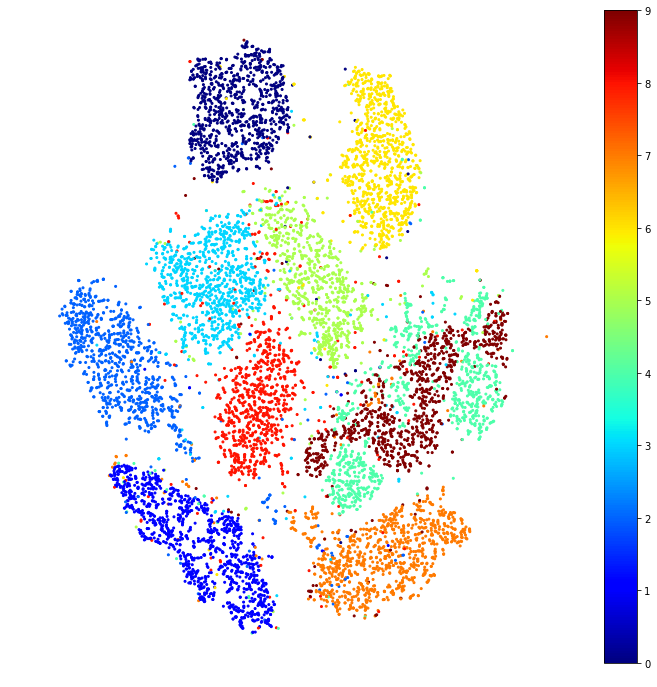

In [38]:
# Defining a function for plotting the data and plotting the result
# of reducing the data to a 2D space with t-SNE.

import matplotlib.pyplot as plt

def plot_data(X_reduced, y, min_distance=0.05):
  plt.figure(figsize=(12,12))
  plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, s=[4 for _ in y],
              cmap='jet')
  plt.colorbar()
  plt.axis('off')
  plt.show()

plot_data(X_reduced, y)

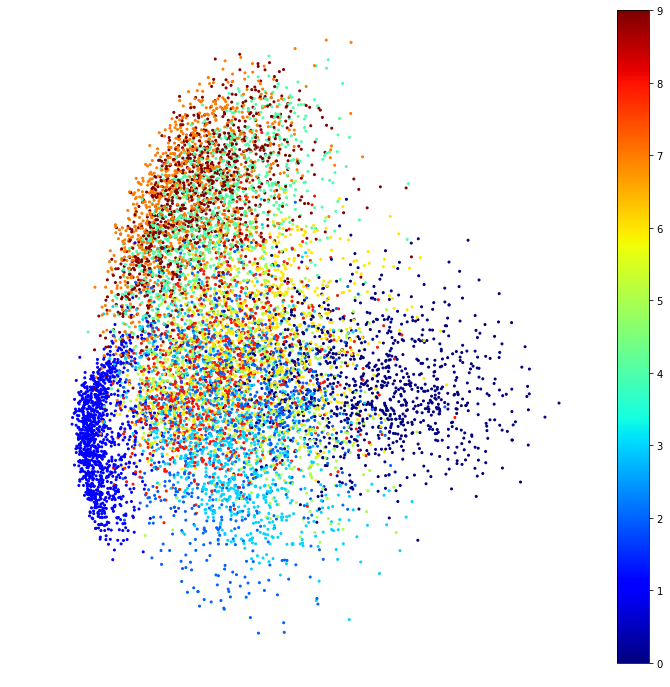

In [40]:
# Plotting the result of projecting the data into 2D space
# with PCA.

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plot_data(X_reduced, y)

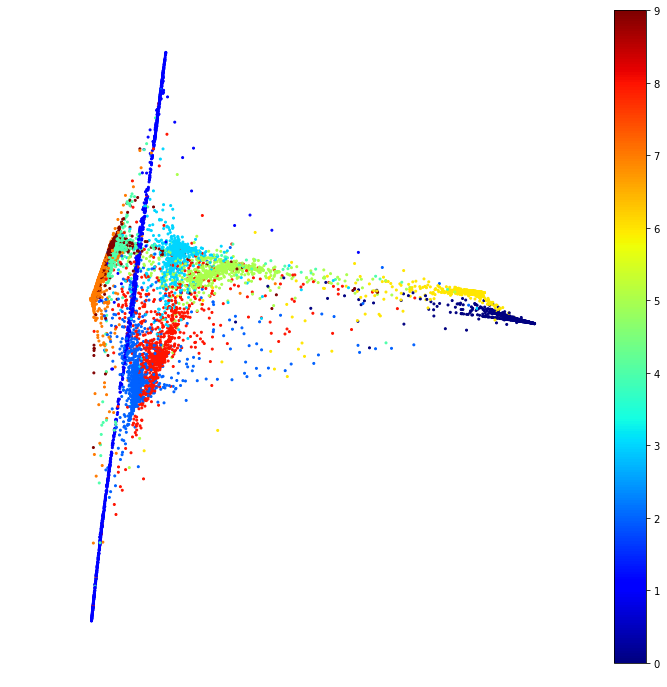

In [43]:
# This time we will use LLE.

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_reduced = lle.fit_transform(X)
plot_data(X_reduced, y)

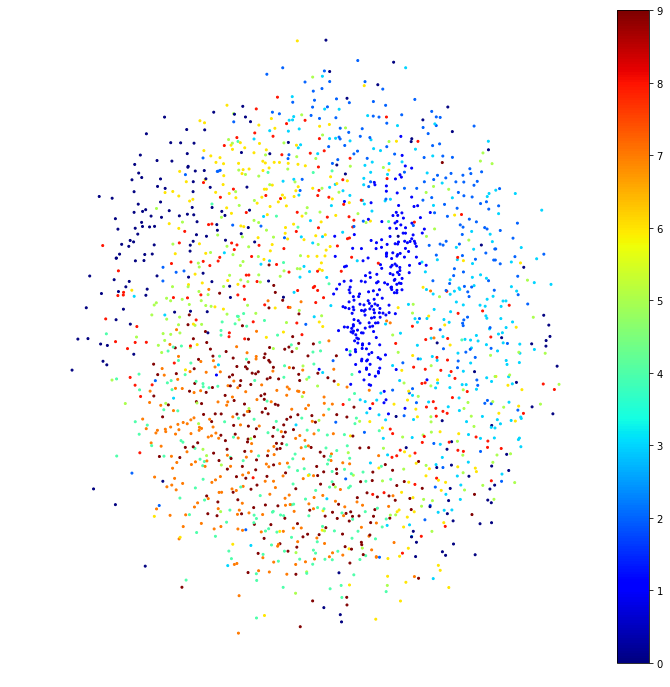

In [45]:
# Plotting the result of projecting the data into 2D space using MDS
# on only the first 2000 instances.

from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced = mds.fit_transform(X[:2000])
plot_data(X_reduced, y[:2000])